In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kidney_disease_dataset_preprocessed.csv')
df

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCells,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,93.0,...,38.0,6000.0,4.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [4]:
ind_features = df.drop(columns = ["class"],axis =1)
X = ind_features
dep_features = df['class']
y = dep_features

In [5]:
from collections import Counter
Counter(y)

Counter({0: 250, 1: 150})

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=5)
X_resampled, y_resampled = smote.fit_resample(X, y)
X = X_resampled
y = y_resampled
Counter(y_resampled)

Counter({0: 250, 1: 250})

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score
SVCmodel=  SVC(probability=True)  
SVCmodel.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

y_predict = SVCmodel.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_predict)

print(f"Training Accuracy of SVC is {accuracy_score(y_train, SVCmodel.predict(X_train))}")
print(f"Testing Accuracy of KNN is {svc_accuracy} \n")
cm =confusion_matrix(y_test, SVCmodel.predict(X_test))
class_report = classification_report(y_test, y_predict)

Training Accuracy of SVC is 0.5786666666666667
Testing Accuracy of KNN is 0.568 



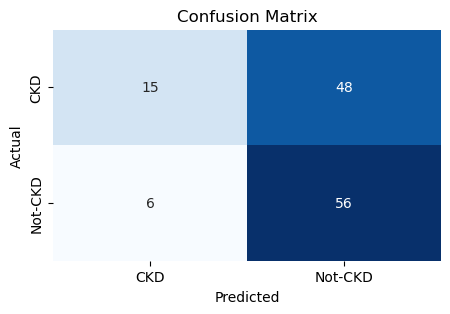

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['CKD', 'Not-CKD'], yticklabels=['CKD', 'Not-CKD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

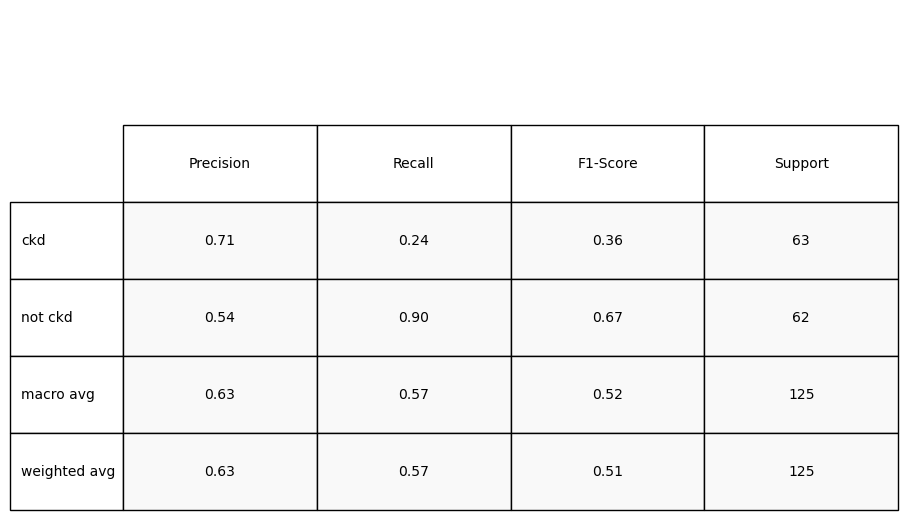

In [10]:
lines = class_report.split('\n')
classes = ['ckd','not ckd','macro avg','weighted avg']
table_data = []

for line in lines[2:]:
    if line.strip() and not line.strip().startswith(('accuracy')):  # Check if the line is not empty
        t = line.split()
        v = []
        for x in t[1:]:            
            if (x != 'avg'):
                v.append(x)      
        table_data.append(v)
table_data
# Plot the classification report as a table
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')

ax.table(cellText=table_data, colLabels=['Precision', 'Recall', 'F1-Score', 'Support'],
         rowLabels=classes, cellLoc='center', loc='top', 
         cellColours=[['#f9f9f9', '#f9f9f9', '#f9f9f9', '#f9f9f9']]*len(classes),bbox=[0, -0.3, 1, 1])
plt.show()

ROC_AUC Score of SVM:  0.6484239999999999


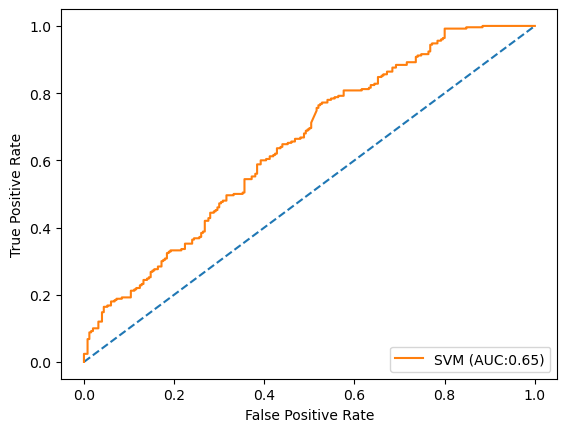

In [11]:
prob_value = SVCmodel.predict_proba(X)[:,1]
auc = roc_auc_score(y,prob_value)
print("ROC_AUC Score of SVM: ",auc)
fpr,tpr, threshold =  roc_curve(y,prob_value)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr,label = '%s (AUC:%0.2f)'  % ('SVM', auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend( loc='lower right')
plt.show()